Задание 1

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [99]:
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

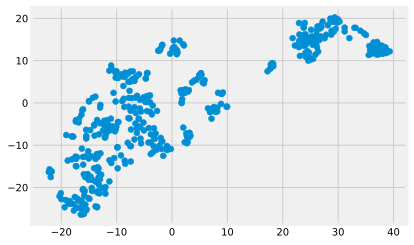

In [66]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Задание 2

In [67]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels = km.fit_predict(X_train_scaled)

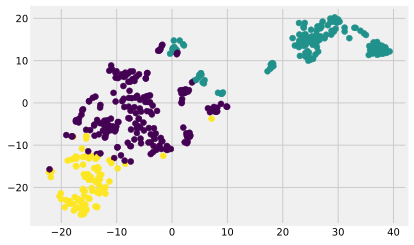

In [68]:
X_train_tsne2 = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne2[:, 0], X_train_tsne2[:, 1], c=labels)
plt.show()

In [103]:
pd.options.display.max_columns = 100
X_train['Cluster'] = labels
X_train['price'] = y_train

In [104]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Cluster,price
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,1,12.0
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,0,19.9
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,2,19.4
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,1,13.4
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,0,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66,0,19.5
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00,0,21.1
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,2,24.5
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27,1,13.4


In [105]:
CRIM_mean_0 = X_train.where(X_train['Cluster'] == 0)['CRIM'].mean()
CRIM_mean_1 = X_train.where(X_train['Cluster'] == 1)['CRIM'].mean()
CRIM_mean_2 = X_train.where(X_train['Cluster'] == 2)['CRIM'].mean()
CRIM_mean_0, CRIM_mean_1, CRIM_mean_2

(0.42166020942408367, 10.797028425196853, 0.07356558139534886)

In [106]:
price_mean_0 = X_train.where(X_train['Cluster'] == 0)['price'].mean()
price_mean_1 = X_train.where(X_train['Cluster'] == 1)['price'].mean()
price_mean_2 = X_train.where(X_train['Cluster'] == 2)['price'].mean()
price_mean_0, price_mean_1, price_mean_2

(24.958115183246072, 16.165354330708666, 27.788372093023252)

Задание 3

In [111]:
labels_test = km.fit_predict(X_test)
X_test['Cluster'] = labels_test
X_test['price'] = y_test

CRIM_mean_0 = X_test.where(X_test['Cluster'] == 0)['CRIM'].mean()
CRIM_mean_1 = X_test.where(X_test['Cluster'] == 1)['CRIM'].mean()
CRIM_mean_2 = X_test.where(X_test['Cluster'] == 2)['CRIM'].mean()
CRIM_mean_0, CRIM_mean_1, CRIM_mean_2

(19.021665714285714, 0.2464211594202899, 8.469301923076923)

In [112]:
price_mean_0 = X_test.where(X_test['Cluster'] == 0)['price'].mean()
price_mean_1 = X_test.where(X_test['Cluster'] == 1)['price'].mean()
price_mean_2 = X_test.where(X_test['Cluster'] == 2)['price'].mean()
price_mean_0, price_mean_1, price_mean_2

(12.814285714285713, 23.911594202898552, 17.39230769230769)